In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from IPython.display import display, HTML
import re

In [147]:
# Read the CSV file into a Pandas dataframe
df = pd.read_csv("../data/startup_funding.csv")

# Convert 'Amount in USD' to float data type, replacing 'undisclosed' values with NaN
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'].str.replace(',', ''), errors='coerce')
df["InvestmentnType"] = df["InvestmentnType"].fillna("Unknown")
df['InvestmentnType'] = df['InvestmentnType'].apply(lambda x: re.sub(r'\\\\', r'\\', x))

# Define a mapping dictionary to consolidate redundant investment types
investment_mapping = {
    "Private Equity Round": "Private Equity",
    "Pre-series A": "Seed/Angel Funding",
    "Seed Round": "Seed/Angel Funding",
    "Seed": "Seed/Angel Funding",
    "Series F": "Series F+",
    "Series G": "Series F+",
    "Series H": "Series F+",
    "Venture": "Unknown Round",
    "Funding Round": "Unknown Round",
    "Corporate Round": "Uncategorized",
    "Maiden Round": "Uncategorized",
    "pre-series A": "Seed/Angel Funding",
    "Seed Funding Round": "Seed/Angel Funding",
    "Single Venture": "Unknown Round",
    "Venture Round": "Unknown Round",
    "Angel": "Seed/Angel Funding",
    "Series J": "Series F+",
    "Angel Round": "Seed/Angel Funding",
    "pre-Series A": "Seed/Angel Funding",
    "Venture - Series Unknown": "Unknown Round",
    "Bridge Round": "Unknown Round",
    "Debt and Preference capital": "Debt Funding",
    "Inhouse Funding": "Uncategorized",
    "Seed/ Angel Funding": "Seed/Angel Funding",
    "Debt": "Debt Funding",
    "Pre Series A": "Seed/Angel Funding",
    "Debt-Funding": "Debt Funding",
    "Mezzanine": "Debt Funding",
    "Series B (Extension)": "Uncategorized",
    "Equity Based Funding": "Uncategorized",
    "Private Funding": "Private Equity",
    "Seed / Angel Funding": "Seed/Angel Funding",
    "Seed funding": "Seed/Angel Funding",
    "Seed / Angle Funding": "Seed/Angel Funding",
    "Angel / Seed Funding": "Seed/Angel Funding",
    "Private": "Private Equity",
    "Structured Debt": "Debt Funding",
    "Term Loan": "Debt Funding",
    "PrivateEquity": "Private Equity",
    "Angel Funding": "Seed/Angel Funding",
    "Seed\\nFunding": "Seed/Angel Funding",
    "Private\\nEquity": "Private Equity",
    "Crowd funding": "Uncategorized",
    "Unknown": "Unknown",
    "Private Equity Round": "Private Equity",
    "Series C": "Series C",
    "Series B": "Series B",
    "Pre-series A": "Seed/Angel Funding",
    "Seed Round": "Seed/Angel Funding",
    "Series A": "Series A",
    "Series D": "Series D",
    "Seed": "Seed/Angel Funding",
    "Series F": "Series F+",
    "Series E": "Series E",
    "Series G": "Series F+",
    "Series H": "Series F+",
    "Venture": "Unknown Round",
    "Seed Funding": "Seed/Angel Funding",
    "Funding Round": "Unknown Round",
    "Corporate Round": "Uncategorized",
    "Maiden Round": "Uncategorized",
    "pre-series A": "Seed/Angel Funding",
    "Seed Funding Round": "Seed/Angel Funding",
    "Single Venture": "Unknown Round",
    "Venture Round": "Unknown Round",
    "Pre-Series A": "Seed/Angel Funding",
    "Angel": "Seed/Angel Funding",
    "Series J": "Series F+",
    "Angel Round": "Seed/Angel Funding",
    "pre-Series A": "Seed/Angel Funding",
    "Venture - Series Unknown": "Unknown Round",
    "Bridge Round": "Unknown Round",
    "Debt and Preference capital": "Debt Funding",
    "Inhouse Funding": "Uncategorized",
    "Seed/ Angel Funding": "Seed/Angel Funding",
    "Debt": "Debt Funding",
    "Pre Series A": "Seed/Angel Funding",
    "Equity": "Uncategorized",
    "Debt-Funding": "Debt Funding",
    "Mezzanine": "Debt Funding",
    "Series B (Extension)": "Unknown Round",
    "Equity Based Funding": "Uncategorized",
    "Private Funding": "Private Equity",
    "Seed / Angel Funding": "Seed/Angel Funding",
    "Seed funding": "Seed/Angel Funding",
    "Seed / Angle Funding": "Seed/Angel Funding",
    "Angel / Seed Funding": "Seed/Angel Funding",
    "Private": "Private Equity",
    "Structured Debt": "Debt Funding",
    "Term Loan": "Debt Funding",
    "PrivateEquity": "Private Equity",
    "Angel Funding": "Seed/Angel Funding",
    "Seed\\nFunding": "Seed/Angel Funding",
    "Private\\nEquity": "Private Equity",
    "Crowd funding": "Uncategorized",
    "Crowd Funding": "Uncategorized",
    "Debt Funding": "Debt Funding",
    "Private Equity": "Private Equity",
    "Seed/Angel Funding": "Seed/Angel Funding",
    "Seed\nFunding": "Seed/Angel Funding",
    "Private\nEquity": "Private Equity",
}

# Map redundant investment types to their corresponding consolidated type in the DataFrame
df["InvestmentnType"] = df["InvestmentnType"].map(investment_mapping)

# Display the first few rows of the dataframe to check if it loaded correctly
print(df.head(5))

   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name     InvestmentnType  Amount in USD Remarks  
0    Tiger Global Management      Private Equity    200000000.0     NaN  
1  Susquehanna Growth 

In [148]:
df["Industry Vertical"] = df["Industry Vertical"].fillna("Unknown")
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x: re.sub(r'\\\\', r'\\', x))


print(df['Industry Vertical'].describe())

industry_mapping = {
    'E-Tech': 'Technology',
    'Transportation': 'Transportation & Logistics',
    'E-commerce': 'E-commerce',
    'FinTech': 'Finance & Fintech',
    'Fashion and Apparel': 'Fashion & Apparel',
    'Logistics': 'Transportation & Logistics',
    'Hospitality': 'Hospitality & Travel',
    'Technology': 'Technology',
    'E-Commerce': 'E-commerce',
    'Aerospace': 'Aerospace & Defense',
    'B2B-focused foodtech startup': 'B2B & Foodtech',
    'Finance': 'Finance & Fintech',
    'Video': 'Media & Entertainment',
    'Gaming': 'Media & Entertainment',
    'Software': 'Software & SaaS',
    'Health and wellness': 'Health & Wellness',
    'Education': 'Education & Edtech',
    'Food and Beverage': 'Food & Beverage',
    'Health and Wellness': 'Health & Wellness',
    'B2B Marketing': 'B2B',
    'Video Games': 'Media & Entertainment',
    'SaaS': 'Software & SaaS',
    'Last Mile Transportation': 'Transportation & Logistics',
    'Healthcare': 'Healthcare & Healthtech',
    'Customer Service': 'Customer Service',
    'B2B': 'B2B',
    'Consumer Goods': 'Consumer Goods',
    'Advertising, Marketing': 'Advertising & Marketing',
    'IoT': 'IoT & AI',
    'Information Technology': 'Information Technology',
    'Consumer Technology': 'Consumer Technology',
    'Accounting': 'Accounting & Finance',
    'Retail': 'Retail',
    'Customer Service Platform': 'Customer Service',
    'Automotive': 'Automotive',
    'EdTech': 'Education & Edtech',
    'Services': 'Services',
    'Compliance': 'Compliance & Legal',
    'Transport': 'Transportation & Logistics',
    'Artificial Intelligence': 'IoT & AI',
    'Tech': 'Technology',
    'Health Care': 'Healthcare & Healthtech',
    'Luxury Label': 'Fashion & Apparel',
    'Waste Management Service': 'Waste Management & Recycling',
    'Deep-Tech': 'Deep Tech',
    'Agriculture': 'Agriculture & Agtech',
    'Energy': 'Energy & Utilities',
    'Digital Media': 'Media & Entertainment',
    'Saas': 'Software & SaaS',
    'Automobile': 'Automotive',
    'Agtech': 'Agriculture & Agtech',
    'Social Media': 'Social Media',
    'Fintech': 'Finance & Fintech',
    'Edtech': 'Education & Edtech',
    'AI': 'IoT & AI',
    'Ecommerce': 'E-commerce',
    'Nanotechnology': 'Nanotechnology & Material Science',
    'Services Platform': 'Services',
    'Travel Tech': 'Hospitality & Travel',
    'Online Education': 'Education & Edtech',
    'Online Marketplace': 'Online Marketplace',
    'SaaS, Ecommerce': 'Software & SaaS',
    'NBFC': 'Finance & Fintech',
    'Food': 'Food & Beverage',
    'Food Tech': 'Food & Beverage',
    'Automation': 'Automation & Robotics',
    'Investment': 'Investment & Finance',
    'Social Network': 'Social Media',
    'Financial Tech': 'Finance & Fintech',
    'Fashion': 'Fashion & Apparel',
    'Real Estate': 'Real Estate',
    'Logistics Tech': 'Transportation & Logistics',
    'Consumer Internet': 'Consumer Internet',
    'B2B Platform': 'B2B',
    'Fin-Tech': 'Finance & Fintech',
    'Food-Tech': 'Food & Beverage',
    'Ed-Tech': 'Education & Edtech',
    'IT': 'Information Technology',
    'Ed-tech': 'Education & Edtech',
    'Clean-tech': 'Cleantech & Environment',
    'Fiinance': 'Finance & Fintech',
    'Food & Beverages': 'Food & Beverage',
    'Media': 'Media & Entertainment',
    'Food and Beverages': 'Food & Beverage',
    'Publishing': 'Publishing & Media',
    'Entertainment': 'Media & Entertainment',
    'Consumer internet': 'Consumer Internet',
    'ECommerce': 'E-commerce',
    'eCommerce': 'E-commerce',
    'Inspiration': 'Lifestyle & Inspiration',
    'Storytelling': 'Media & Entertainment',
    'Lifestyle': 'Lifestyle & Inspiration',
    'Food & Beverage': 'Food & Beverage',
    'eCommece': 'E-commerce',
    'Consumer Portal': 'Consumer Internet',
    'Others': 'Others',
    'ecommerce': 'E-commerce',
    'healthcare': 'Healthcare & Healthtech',
    'FMCG': 'Consumer Goods',
    'Reality': 'Real Estate',
    'Auto': 'Automotive',
    'BFSI': 'Finance & Fintech',
    'Consumer Interne': 'Consumer Internet',
    'Online Education Information platform': 'Education & Edtech',
    'Brand Licensing Startup': 'Branding & Licensing',
    'Gourmet Food Discovery & Delivery platform': 'Food & Beverage',
    'Transportation & Logistics Platform': 'Transportation & Logistics',
    'Enterprise Marketing Automation platform': 'Software & SaaS',
    'Health, Wellness & Beauty Services App': 'Health & Wellness',
    'Digital Healthcare': 'Healthcare & Healthtech',
    'Last Minute Hotel Booking App': 'Hospitality & Travel',
    'Womens Fashion Wear Portal': 'Fashion & Apparel',
    'Product Learning platform': 'Education & Edtech',
    'Online Food ordering & Delivery platform': 'Food & Beverage',
    'App based Bus Pooling Services': 'Transportation & Logistics',
    'Social Learning Platform': 'Education & Edtech',
    'Social Fitness platform': 'Health & Wellness',
    'On Demand Mobile app developer': 'Technology',
    'Car Maintenance & Management mobile app': 'Automotive',
    'Online Wedding Marketplace': 'Weddings & Events',
    'Splitting Bills Mobile App': 'Finance & Fintech',
    'IOT Energy Management Analytics platform': 'IoT & AI',
    'Custom Made furniture e-tailer': 'Retail',
    'QSR Chain': 'Food & Beverage',
    'eLearning platform': 'Education & Edtech',
    'Smart Safety Wearable Devices': 'Wearable Technology',
    'Cab Sharing service Mobile app': 'Transportation & Logistics',
    'Cloud Enterprise Mobility Platform': 'Software & SaaS',
    'Online Shopping Assistant Mobile app': 'E-commerce',
    'Home Cooked Food Order & Delivery platform': 'Food & Beverage',
    'Online School for Analytics learning': 'Education & Edtech',
    'Chat based personal Assistant App': 'Artificial Intelligence',
    'Picture creation & Social mobile app': 'Social Media',
    'Nonbanking finance company': 'Finance & Fintech',
    'eCommerce returns etailer': 'E-commerce',
    'Online Freight Services Aggregator': 'Transportation & Logistics',
    'Online Branded Furniture etailer': 'Retail',
    'Digital Analytics Platform': 'Software & SaaS',
    'Internet Network Infrastructure Services': 'Information Technology',
    'Supply Chain & Logistics Solutions': 'Transportation & Logistics',
    'Holiday Resort Chain': 'Hospitality & Travel',
    'Mobile Point of Sale solutions': 'Software & SaaS',
    'Peer-to-Peer Money Transfer & Recharge App': 'Finance & Fintech',
    'Test Automation SAAS platform': 'Software & SaaS',
    'Citizens Engagement Platform': 'Civic & Social Engagement',
    'Indoor Navigation & Analytics Solutions': 'Software & SaaS',
    'Hyperlocal On-Demand Household Services platform': 'Services',
    'Online RTI application services': 'Government & Public Services',
    'ECommerce Website Creation SAAS platform': 'Software & SaaS',
    'Wedding Venues & Vendors Marketplace': 'Weddings & Events',
    'Interface development platform for Government officials': 'Government & Public Services',
    'Modular Furnishings Marketplace': 'Retail',
    'Private Jet Bookings Marketplace': 'Transportation & Logistics',
    'Cab search Comparison & Booking platform': 'Transportation & Logistics',
    'Performance Optimization Platform for athletes': 'Sports & Fitness',
    'Event Venue Booking Platform': 'Events & Venues',
    'Digital Media Platform': 'Media & Entertainment',
    'visual search and discovery platform': 'Software & SaaS',
    'Home services marketplace': 'Services',
    'End to End reverse logistics Solution platform': 'Transportation & Logistics',
    'Virtual Health consultation app': 'Healthcare & Healthtech',
    'Online Renting platform': 'Online Marketplace',
    'Logistics Services Provider': 'Transportation & Logistics',
    'Data Science & UX design Learning platform': 'Education & Edtech',
    'Online marketplace for Chef Meals': 'Food & Beverage',
    'Electric Bike Manufacturers': 'Automotive',
    'ECommerce platform solutions': 'E-commerce',
    'Online Media Publication': 'Media & Entertainment',
    'International Hiring Platform': 'Employment & Recruitment',
    'Logistics Service Provider Marketplace': 'Transportation & Logistics',
    'Hyperlocal Grocery Delivery Service': 'Food & Beverage',
    'Sports Education Platform': 'Education & Edtech',
    'Bike, Appliances Renting marketplace': 'Online Marketplace',
    'Online Marketplace for Industrial Goods': 'B2B',
    'Reward points mobile app': 'Loyalty & Rewards',
    'Mobile accessories online store': 'E-commerce',
    'Content Discovery & reward points platform': 'Content & Media',
    'Artificial Intelligence platform': 'IoT & AI',
    'Medical Consultation & Doctor appointment booking platform': 'Healthcare & Healthtech',
    'Mobile Fitness App': 'Health & Wellness',
    'Digital Coupons, Deal & Cashback aggregator app': 'Discounts & Coupons',
    'Mobile Game development & Design platform': 'Media & Entertainment',
    'B2B eCommerce Marketplace': 'B2B',
    'Furniture and appliances rental platform': 'Online Marketplace',
    'B2B Merchandize platform': 'B2B',
    'Real Estate focused Tech platform': 'Real Estate',
    'Photographer Online search & booking platform': 'Services',
    'Grocery Delivery platform': 'Food & Beverage',
    'Mobile Car Servicing appointment app': 'Automotive',
    'New Curation Mobile App': 'Content & Media',
    'Mobile Wallet': 'Finance & Fintech',
    'Online Food Ordering & Delivery platform': 'Food & Beverage',
    'Bus Aggregation and rental mobile app': 'Transportation & Logistics',
    'hyperlocal online Services platform': 'Services',
    'WiFi-first Cloud communication platform': 'Information Technology',
    'Alternate Mobile Monetization platform': 'Software & SaaS',
    'Online Food Ordering Marketplace': 'Food & Beverage',
    'Quick Service Restaurant & Online Delivery': 'Food & Beverage',
    'Online Loans Marketplace': 'Finance & Fintech',
    'Budget Hotels Aggregator': 'Hospitality & Travel',
    'Efficient Energy Management platform': 'Cleantech & Environment',
    'Digital Intelligent learning platform': 'Education & Edtech',
    'Voice Call incentivization mobile app': 'Telecommunications',
    'Online Counselling and psychological support platform': 'Healthcare & Healthtech',
    'Domestic Help Aggregation platform': 'Services',
    'Home Stay & room rentals platform': 'Hospitality & Travel',
    'Selfie Mobile App': 'Social Media',
    'Online Reputation Management Platform': 'Software & SaaS',
    'Online Grocery platform': 'Food & Beverage',
    'Online content platform for women': 'Media & Entertainment',
    'Online Vehicle Spare Parts etailer': 'Automotive',
    'Event Ticketing platform': 'Events & Venues',
    'affordable Personal Healthcare Products': 'Healthcare & Healthtech',
    'Premium dining Lounges & restaurants': 'Hospitality & Travel',
    'Mobile Growth Hacking Platform': 'Software & SaaS',
    'Skill Training Startup': 'Education & Edtech',
    'Beauty and Wellness Marketplace': 'Health & Wellness',
    'Marketplace App for Bangkok': 'Online Marketplace',
    'On-demand Maids Service Provider': 'Services',
    'eCommerce Product Search Engine': 'E-commerce',
    'Ready to cook packaged Foods': 'Food & Beverage',
    'Product Customization Platform': 'E-commerce',
    'Branded Food products online sales': 'Food & Beverage',
    'Talent platform for Fashion professionals': 'Fashion & Apparel',
    'Auto Insurance Online platform': 'Insurance',
    'Hyperlocal Logistics Service Provider': 'Transportation & Logistics',
    'Cricket Management Mobile Game': 'Media & Entertainment',
    'On Demand Laundry Service platform': 'Services',
    'Ecommerce Discount & Cashback coupons platform': 'Discounts & Coupons',
    'Virtual Reality Headset creator': 'VR & AR',
    'Home Improvement Service platform': 'Home Services',
    'mobile-only tasks marketplace': 'Services',
    'Women Ethnic Wear Online Marketplace': 'Fashion & Apparel',
    'Numerical Computing & Data Science Platform': 'Software & SaaS',
    'Designer fashion Jewellery Marketplace': 'Fashion & Apparel',
    'Online Products Discovery Platform': 'E-commerce',
    'Kids Tool kit for Innovation platform': 'Education & Edtech',
    'Mobile Learning Solutions': 'Education & Edtech',
    'Car Aggregator & Retail Mobile App': 'Automotive',
    'conversational commerce mobile app': 'E-commerce',
    'Viral Content web Platform': 'Media & Entertainment',
    'Express local delivery platform': 'Transportation & Logistics',
    'On-Demand Local Logistics provider': 'Transportation & Logistics',
    'Curated Freelancer Marketplace': 'Employment & Recruitment',
    'Online Taxi Rental Platform': 'Transportation & Logistics',
    'Mobile Services Marketplace': 'Software & SaaS',
    'Smartwatch Maker': 'Wearable Technology',
    'Online Gourmet Food Marketplace': 'Food & Beverage',
    'Online Jewellery etailer': 'Fashion & Apparel',
    'Sales & Productivity Software': 'Software & SaaS',
    'eCommerce related software product platform': 'Software & SaaS',
    'Health-Tech platform': 'Healthcare & Healthtech',
    'Nightlife Discovery Mobile App': 'Events & Venues',
    'Online Real Estate Marketplace': 'Real Estate',
    'Home Healthcare Services platform': 'Healthcare & Healthtech',
    'Indian Ethnic Crafts Etailer': 'E-commerce',
    'Social platform for traders and investors': 'Finance & Fintech',
    'Online Furniture, Home Appliances Rental Platform': 'E-commerce',
    'Healthcare Services Discovery platform': 'Healthcare & Healthtech',
    'Health and Beauty Services Marketplace': 'Health & Wellness',
    'Automotive Services platform': 'Automotive',
    'Online and TV Shopping Marketplace': 'E-commerce',
    'Big Data Analytics Platform': 'Software & SaaS',
    'Mobile App based Loan disbursement platform': 'Finance & Fintech',
    'On Demand Laundry Services App': 'Services',
    'Education Content Provider': 'Education & Edtech',
    'Content Management Software Solutions': 'Software & SaaS',
    'Fitness Tracking Management Solutions': 'Health & Wellness',
    'Hyper-local Grocery Delivery platform': 'Food & Beverage',
    'Hyperlocal healthcare product Delivery Service provider': 'Healthcare & Healthtech',
    'Online Lending Marketplace': 'Finance & Fintech',
    'On Demand Beauty Services Platform': 'Health & Wellness',
    'Self Driven Rental Car Platform': 'Automotive',
    'Education Content etailer': 'Education & Edtech',
    'Clud based Learning platform': 'Education & Edtech',
    'Talent Exchange & Talent Services Marketplace': 'Human Resources',
    'Two-Wheeler Taxi Service': 'Transportation',
    'character merchandize sales platform': 'E-commerce',
    'Mobile Application Developer': 'Software & SaaS',
    'Ecommerce Delivery locker services': 'E-commerce',
    'extra curricular activities marketplace app': 'Education & Edtech',
    'Hyperlocal Online Home services provider': 'Services',
    'Easy Business Loans platform': 'Finance & Fintech',
    'Performance based Wholesale Marketplace': 'E-commerce',
    'Professional Services Marketplace': 'Services',
    'Movie-on-demand platform': 'Entertainment',
    'us ticketing and fleet management platform': 'Transportation',
    'Online Income Tax Filing platform': 'Finance & Fintech',
    'Product discovery & recommendation platform': 'E-commerce',
    'Mobile Payments App': 'Finance & Fintech',
    'Beauty & Wellness Products e-tailer': 'Health & Wellness',
    'Fashion jewelry and accessories e-tailer': 'E-commerce',
    'Online Consumer Lending platform': 'Finance & Fintech',
    'Premium Apparel shopping portal': 'E-commerce',
    'Exclusive Platform for Doctors & Healthcare professionals': 'Healthcare & Healthtech',
    'Job Board': 'Human Resources',
    'Sports Management & Physical Education Business': 'Sports & Fitness',
    'multi-sport program for preschoolers': 'Education & Edtech',
    'QSR & Online delivery portal': 'Food & Beverage',
    'Online Homeopathy Clinic': 'Healthcare & Healthtech',
    'E-Learning Service Provider': 'Education & Edtech',
    'Organic Food etailer': 'Food & Beverage',
    'Delivery & Logistics Service provider': 'Logistics',
    'Product Discovery & comparison App': 'E-commerce',
    'Online Apparels Fashion brand': 'E-commerce',
    'Home Cooked Food marketplace & Delivery': 'Food & Beverage',
    'Gesture based Mobile Development': 'Software & SaaS',
    'Hotel Mobile CRM Software platform': 'Hospitality',
    'Rental Accommodation Search platform': 'Real Estate',
    'Logistics Tech Platform': 'Logistics',
    'Developer Portfolio Showcase platform': 'Software & SaaS',
    'Doctors Network Mobile App': 'Healthcare & Healthtech',
    'End-to-End Lending platform': 'Finance & Fintech',
    'on-demand healthcare marketplace': 'Healthcare & Healthtech',
    '360-degree view creating platform': 'Software & SaaS',
    'Advertising & Marketing Community Networking platform': 'Marketing',
    'Food Ordering & Delivery App': 'Food & Beverage',
    'Ride Sharing platform': 'Transportation',
    'Online P2P lending marketplace': 'Finance & Fintech',
    'B2B marketplace for industrial goods': 'B2B',
    'Cloud Based Collaboration platform': 'Software & SaaS',
    'global community for travellers': 'Travel & Tourism',
    'Prepaid Bill manager App': 'Finance & Fintech',
    'Mobile Only Shopping Assistant': 'E-commerce',
    'Mobile Messaging Assistant App': 'Software & SaaS',
    'Personalized Wish List creator app': 'E-commerce',
    'Music Streaming mobile app': 'Entertainment',
    'Raw Meat & Ready to eat food etailer': 'Food & Beverage',
    'Gym Discovery platform': 'Sports & Fitness',
    'Online Purchase rewards app': 'E-commerce',
    'Home rental platform': 'Real Estate',
    'Crowdsourced Delivery platform': 'Logistics',
    'Real Estate Insights platform': 'Real Estate',
    'Structural & Civil Engg Service Automation': 'Construction & Engineering',
    'Startup Funding Marketplace': 'Finance & Fintech',
    'Payments Solution platform': 'Finance & Fintech',
    'Travel Destination Discovery platform': 'Travel & Tourism',
    'Order Fulfillment SAAS platform': 'Logistics',
    'Last Mile Delivery Service': 'Logistics',
    'Healthcare IT Solutions & services': 'Healthcare & Healthtech',
    'Gourmet Meals Delivery': 'Food & Beverage',
    'Healthy Meals Food delivery platform': 'Food & Beverage',
    'Real Estate Mobile CRM': 'Real Estate',
    'Micro-Brewery': 'Food & Beverage',
    'Home Made Food Marketplace': 'Food & Beverage',
    'residential rental management platform': 'Real Estate',
    'Personalized Stock Intelligence Platform': 'Finance & Fintech',
    'Personal Diagnostic Mobile App': 'Healthcare & Healthtech',
    'Online food ordering & Delivery service': 'Food & Beverage',
    'Hotel Aggregator & booking platform': 'Hospitality',
    'Online Logistics Platform': 'Logistics',
    'Online Student & Campus Social Networking platform': 'Education & Edtech',
    'Professionals & Project Search Marketplace': 'Human Resources',
    'Online Pharmacy': 'Healthcare & Healthtech',
    'Online Payment Gateway': 'Finance & Fintech',
    'Psychometric Test Online Software': 'Human Resources',
    'Location based Nightlife recommendation Platform': 'Entertainment',
    'Professional Health Services Platform': 'Health & Wellness',
    'Hyperlocal Logistics Service': 'Logistics',
    'Online user engagement platform': 'Marketing',
    'Asset Financing platform': 'Finance & Fintech',
    'Virtual Reality activity based learning platform': 'Education & Edtech',
    'Online Grocery Store': 'E-commerce',
    'Investment management platform': 'Finance & Fintech',
    'Industrial Toons Marketplace': 'B2B',
    'Public Commute helper App': 'Transportation',
    'Artificial Intelligence Ecommerce Chatbot': 'E-commerce',
    'Truck Aggregator & Logistics service': 'Logistics',
    'Ridesharing Mobile app': 'Transportation',
    'Food Discovery & Delivery Mobile app': 'Food & Beverage',
    'Competitive exam learning platform': 'Education & Edtech',
    'Document Digitization platform': 'Software & SaaS',
    'proximity marketing & Mobile Advertising platform': 'Marketing',
    'Autorickshaw Aggregator & Booking platform': 'Transportation',
    'FinTech Startup Incubation platform': 'Finance & Fintech',
    'Payment Services platform': 'Finance & Fintech',
    'Personalized Styling platform': 'Fashion',
    'Luxury goods Shopping Platform': 'E-commerce',
    'Food Delivery Platform': 'Food & Beverage',
    'Online Lingerie Marketplace': 'E-commerce',
    'Cloud software solutions': 'Software & SaaS',
    'Job Search Platform': 'Human Resources',
    'Doctor consultancy Mobile App': 'Healthcare & Healthtech',
    'Small Business Financing (NBFC)': 'Finance & Fintech',
    'Beauty & Wellness Services Marketplace': 'Health & Wellness',
    'Online Movie Review Platform': 'Entertainment',
    'ECommerce Brands’ Full Service Agency': 'Marketing',
    'Cloud-based Hotel Booking Platform': 'Hospitality',
    'Community Driven News/Views Platform': 'Media',
    'Study Material Marketplace': 'Education & Edtech',
    'Restaurant Ratings & Reviews platform': 'Food & Beverage',
    'Dairy Based Product Manufacturer': 'Food & Beverage',
    'Government Test Preparation platform': 'Education & Edtech',
    'Smart Report Cards for Schools': 'Education & Edtech',
    'Teacher empowerment platform': 'Education & Edtech',
    'Multilingual Test Preparation Platform': 'Education & Edtech',
    'Industrial Tools Marketplace': 'B2B',
    'Non Profit Organization to alleviate poverty': 'Non-profit & Social Impact',
    'Gym & Fitness Studios Subscription platform': 'Health & Wellness',
    'pre-used luxury item Marketplace': 'E-commerce',
    'pre-used apparel shopping mobile app': 'E-commerce',
    'Home Design & Décor platform': 'Home & Lifestyle',
    'Used Vehicles Marketplace': 'Automotive',
    'Online Bus & Cab ticketing platform': 'Transportation',
    'Mobile App testing platform': 'Software & SaaS',
    'Hyperlocal Delivery Services': 'Logistics',
    'Early Cancer Detection Solutions': 'Healthcare & Healthtech',
    'Cab rental Mobile app': 'Transportation',
    'Online Insurance Distribution Platform': 'Insurance & Insurtech',
    'Mobile Marketing Automation Platform': 'Marketing',
    'Prepaid Mobile Bill Manager App': 'Mobile & Telecommunications',
    'Chain of Tea Cafés': 'Food & Beverage',
    'Branded Budget Hotel Marketplace': 'Hospitality',
    'Home Fitting & Fixtures Marketplace': 'Home & Lifestyle',
    'Food Subscription platform': 'Food & Beverage',
    'Wedding Planning Platform': 'Events & Entertainment',
    'B2B Mobile Auction Marketplace': 'B2B',
    'ECommerce Data Analytics Platform': 'E-commerce',
    'Designer Merchandize Marketplace': 'Fashion',
    'Private label Fashion eTailer': 'Fashion',
    'Online Food ordering & delivery': 'Food & Beverage',
    'Real Estate Broker Platform App': 'Real Estate',
    'Online Health & Wellness platform': 'Health & Wellness',
    'Internet of Things platform': 'IoT',
    'Diagnostic Labs aggregator platform': 'Healthcare & Healthtech',
    'Hyperlocal Delivery Platform': 'Logistics',
    'Home Medical Care Services': 'Healthcare & Healthtech',
    'Real-Time stock data platform': 'Finance & Fintech',
    'Food discovery & table booking app': 'Food & Beverage',
    'coupons and cashback aggregator app': 'E-commerce',
    'Financial Products lead generation platform': 'Finance & Fintech',
    'Sustainable Agri-inputs Firm': 'Agriculture & Agtech',
    'Financial Services Portal': 'Finance & Fintech',
    'Pre-owned games Marketplace': 'Gaming & Esports',
    'Content-based Subscription eCommerce platform': 'E-commerce',
    'virtual reality, 3d simulation and stereoscopic products': 'Technology & VR',
    'Online Interior Designing platform': 'Home & Lifestyle',
    'End-to-end Logistics platform': 'Logistics',
    'Private Label Apparel sales': 'Fashion',
    'Healthcare Consulting platform': 'Healthcare & Healthtech',
    'Stock Market Portal': 'Finance & Fintech',
    'Cross-device retargeting platform': 'Marketing',
    'Digital & Physical Publishing platform': 'Media & Publishing',
    'Data Driven Publishing platform': 'Media & Publishing',
    'Employee OnBoarding & Orientation platform': 'Human Resources',
    'Solar Power Solutions company': 'Energy & Cleantech',
    'Online Meat Ordering platform': 'Food & Beverage',
    'online meal-booking platform for train travelers': 'Travel & Tourism',
    'hyperlocal delivery platform': 'Logistics',
    'Cab Booking app platform': 'Transportation',
    'E-Commerce & M-Commerce platform': 'E-commerce',
    'Mobile Advertising platform': 'Marketing',
    'Hyperlocal Grocery Delivery': 'E-commerce',
    'Ecommerce Product recommendation platform': 'E-commerce',
    'Activity Based Social Network': 'Social Media',
    'Fashion Discovery platform': 'Fashion',
    'Consumer lending marketplace': 'Finance & Fintech',
    'Big Data Management Platform': 'Big Data & Analytics',
    'Budget Accommodation Platform': 'Hospitality',
    'Local Mobile OS': 'Mobile & Telecommunications',
    'Digital Signal processing platform': 'Technology',
    'Ecommerce Marketplace': 'E-commerce',
    'Restaurant Discount app': 'Food & Beverage',
    'Tech-enabled learning': 'Education & Edtech',
    'ECommerce Logistics provider': 'Logistics',
    'on-demand home beauty and wellness portal': 'Beauty & Wellness',
    'Self Driven Car rental': 'Automotive',
    'Budget Hotel accommodation brand': 'Hospitality',
    'Energy & Environment Online Marketplace': 'Energy & Cleantech',
    'User Engagement & Analytics platform': 'Big Data & Analytics',
    'On-Demand Delivery Logistics': 'Logistics',
    'fundraising platform for startups': 'Finance & Fintech',
    'Online budget hotel chain': 'Hospitality',
    'Hyperlocal Handyman services': 'Home & Lifestyle',
    'hotel booking app': 'Hospitality',
    'Rental Accommodation finder': 'Real Estate',
    'Tech Platform for property brokers': 'Real Estate',
    'Luxury Apparel rental': 'Fashion',
    'App security testing platform': 'Software & SaaS',
    'Doctor Appointment booking app': 'Healthcare & Healthtech',
    'anonymous bulletin board app': 'Social Media',
    'Travel community platform': 'Travel & Tourism',
    'Crowdfunding platform': 'Finance & Fintech',
    'Mobile-based PoS solution': 'Finance & Fintech',
    'Car & Bike e-commerce platform': 'Automotive',
    'Fast food Chain Franchisee': 'Food & Beverage',
    'Loyalty Programs & Reward Points': 'Marketing',
    'Energy-saving solutions provider': 'Energy & Cleantech',
    'Self-Storage Spaces': 'Home & Lifestyle',
    'Grocery retail Mobile app': 'E-commerce',
    'Taxi Rental platform': 'Transportation',
    'Machine Learning Platform': 'AI & Machine Learning',
    'mobile social network': 'Social Media',
    'Hyper-Local Ecommerce': 'E-commerce',
    'Online printing marketplace': 'Printing & Publishing',
    'mobile payment software platform': 'Finance & Fintech',
    'Automated Storage & Warehousing Solution': 'Logistics',
    'Home Design & Décor solutions': 'Home & Lifestyle',
    'Quick Service Restaurant Chain': 'Food & Beverage',
    'Subscription-based Online Grocery platform': 'E-commerce',
    'engineering services company': 'Engineering',
    'Business and IT consulting': 'Business & IT Services',
    'Credit Card Fraud protection solutions': 'Security & Privacy',
    'Online & mobile Grocery store': 'E-commerce',
    'Career Community for Women': 'Education & Edtech',
    'Mutual Fund Investing platform': 'Finance & Fintech',
    'E-commerce Marketing Software Platform': 'Marketing',
    'Financial Inclusion platform': 'Finance & Fintech',
    'Digital Marketing automation solution': 'Marketing',
    'Mobile Commerce for Farmers': 'Agriculture & Agtech',
    'Picture based Social App': 'Social Media',
    'Logistics service platform': 'Logistics',
    'On-Demand Beauty Services': 'Beauty & Wellness',
    'Exam Preparation Platform': 'Education & Edtech',
    'Startup Focused Online Publisher': 'Media & Publishing',
    'Waste Management Solutions': 'Environment & Sustainability',
    'App-based Fitness coaching': 'Health & Wellness',
    'On-demand cleaning & fixing services': 'Home & Lifestyle',
    'Beauty & Lifestyle platform': 'Beauty & Wellness',
    'on-demand delivery service': 'Logistics',
    'Data Analytics Platform': 'Big Data & Analytics',
    'Deep Learning Cloud Algorithms': 'AI & Machine Learning',
    'Location-based engagement & rewards platform': 'Marketing',
    'Online Identity Verification Services platform': 'Security & Privacy',
    'Corporate Wellness App': 'Health & Wellness',
    'Fashion Search & Review Platform': 'Fashion',
    'Hyperlocal Maintenance, Repair & Cleaning services': 'Home & Lifestyle',
    'pre-owned Luxury online apparel seller': 'Fashion',
    'Online Furniture Marketplace': 'Home & Lifestyle',
    'Online Diagnostic Tests Marketplace': 'Healthcare & Healthtech',
    'Online marketplace for Photographers': 'Media & Publishing',
    'Visual Blogging platform': 'Media & Publishing',
    'Food Customer analytics platform': 'Food & Beverage',
    'Professional Service Appointment booking service': 'Professional Services',
    'Scientific Horoscope Online Assistance platform': 'Lifestyle & Astrology',
    'Tech-enabled AC bus service': 'Transportation',
    'On-Demand App-based Professional service provider': 'On-Demand Services',
    'Restaurant Reservation Platform': 'Food & Beverage',
    'Cross-channel CRM platform': 'Customer Relations Management',
    'Professional Custom creators Marketplace': 'Creative Services',
    'on-Demand Washing & Dry-Cleaning': 'Home & Lifestyle',
    'On-Demand Beauty Service': 'Beauty & Wellness',
    'solar products and services marketplace': 'Energy & Cleantech',
    'Online Food Community Platform': 'Food & Beverage',
    'Private Cloud Networks SAAS platform': 'Cloud Computing',
    'Education Marketplace': 'Education & Edtech',
    'Cloud-Based Hotel Sales Platform': 'Hospitality',
    'online recipe sharing platform': 'Food & Beverage',
    'Beauty & Lifestyle Mobile Marketplace': 'Beauty & Wellness',
    'QSR Restaurant Chain': 'Food & Beverage',
    'Digital Media publishing platform': 'Media & Publishing',
    'Online Coffee Delivery platform': 'Food & Beverage',
    'Language Localization Cloud platform': 'Cloud Computing',
    'Big Data & predictive Analysis Platform': 'Big Data & Analytics',
    'Business IT Intelligence Services': 'IT Services',
    'CRM / Analytics platform': 'Customer Relations Management',
    'Hyperlocal Electronics repair Service': 'Electronics',
    'Ed-Tech Platform': 'Education & Edtech',
    'IT infrastructure & Data Center services': 'IT Services',
    'Online Financial Services': 'Finance',
    'Used Car Marketplace': 'Automotive',
    'Language Learning App': 'Education & Edtech',
    'Mobile Fitness Marketplace': 'Health & Fitness',
    'Custom Merchandize platform': 'E-commerce',
    'P2P Pre-owned goods marketplace': 'E-commerce',
    'Custom Furniture Marketplace': 'Home & Lifestyle',
    'Online Tailoring Services': 'Fashion',
    'Rail Ticket Confirmation predictor': 'Transportation',
    'Ethnic Beverages manufacturer': 'Food & Beverage',
    'Hyperlocal Goods marketplace': 'E-commerce',
    'Budget Accommodation aggregator': 'Hospitality',
    'Real Estate Rating & Analysis': 'Real Estate',
    'Food Delivery platform': 'Food & Beverage',
    'Food Discovery App': 'Food & Beverage',
    'Music Streaming App': 'Entertainment',
    'Big Data & Analytics platform': 'Big Data & Analytics',
    'Coupon Aggregator Platform': 'E-commerce',
    'Electric Scooter manufacturer': 'Automotive',
    'Online Food-Tech Platform': 'Food & Beverage',
    'Celebrity Fashion Brand': 'Fashion',
    'Online Finance lending platform': 'Finance',
    'Healthcare Mobile App': 'Healthcare & Healthtech',
    'Self-driven vehicle rental': 'Transportation',
    'News Aggregator mobile app': 'Media & Publishing',
    'Online Jewellery Store': 'Fashion',
    'Fashion Info Aggregator App': 'Fashion',
    'Online Study Notes Marketplace': 'Education & Edtech',
    'Warranty Programs Service Administration': 'Professional Services',
    'Pre-School Chain': 'Education & Edtech',
    'Premium Loyalty Rewards Point Management': 'Loyalty Programs',
    'Contact Center Software Platform': 'Customer Support',
    'Casual Dining restaurant Chain': 'Food & Beverage',
    'Online Grocery Delivery': 'Food & Beverage',
    'Online comparison engine': 'E-commerce',
    'Residential Rental management platform': 'Real Estate',
    'Physical Storage warehouses': 'Storage & Logistics',
    'Tech Recruitment platform': 'Recruitment & HR',
    'Bike Rental Platform': 'Transportation',
    'Tech enabled logistics platform': 'Logistics & Supply Chain',
    'Budget Hotel Accommodation': 'Hospitality',
    'Restaurant customer engagement platform': 'Food & Beverage',
    'Live video streaming app': 'Entertainment',
    'Hyper local logistics platform': 'Logistics & Supply Chain',
    'Crowd Funding Platform': 'Finance',
    'F&B sector Mobile Payment platform': 'Mobile Payments',
    'Industrial Supplies B2B ecommerce': 'B2B & Wholesale',
    'Payment Solutions platform': 'Finance',
    'Online Hiring Platform': 'Recruitment & HR',
    'Organic Food ecommerce': 'Food & Beverage',
    'Fine Dining Restaurant Chain': 'Food & Beverage',
    'Luxury Rental Homes': 'Real Estate',
    'Mobile Point of Sale payment solution': 'Mobile Payments',
    'Online Grocers': 'Food & Beverage',
    'Casual Dating App': 'Lifestyle',
    'Clinical Genomics Provider': 'Healthcare & Healthtech',
    'Travel information portal': 'Travel & Tourism',
    'Fitness Marketplace': 'Health & Fitness',
    'Online & Mobile classified listings': 'E-commerce',
    'Private Jet/ Helicopter Marketplace': 'Transportation',
    'Real Estate Broker network App': 'Real Estate',
    'Ethnic/ Traditional Fashion Store': 'Fashion',
    'Used Bikes Marketplace': 'Automotive',
    'Spa & Salon Management Software': 'Beauty & Wellness',
    'B2B logistics delivery platform': 'Logistics & Supply Chain',
    'Logistics Automation Platform': 'Logistics & Supply Chain',
    'Online home décor marketplace': 'Home & Living',
    'Hyperlocal food & grocery store': 'Food & Beverage',
    'Hyperlocal Handyman Services': 'Home Services',
    'Medical Tech Instruments': 'Healthcare & Healthtech',
    'Hyperlocal Deals Marketplace': 'E-commerce',
    'Innovative Water Solutions': 'Clean Tech & Environmental',
    'Online Jewelry Store': 'Fashion',
    'Business intelligence & Analytics': 'Data & Analytics',
    'Used Vehicle Marketplace': 'Automotive',
    'Educational Board Games': 'Education & Edtech',
    'Chinese food delivery': 'Food & Beverage',
    'On-Demand Laundry & Dry cleaning App': 'Home Services',
    'On-Demand Car services App': 'Automotive',
    'Hyperlocal Grocery App': 'Food & Beverage',
    'Online Curated Holiday package bookings': 'Travel & Tourism',
    'Hasbro Toy Manufacturer': 'Toys & Games',
    'Beauty and Wellness Platform': 'Beauty & Wellness',
    'Healthy Food Manufacturer': 'Food & Beverage',
    'Online Learning Platform': 'Education & Edtech',
    'Healthy Food Online Community': 'Health & Fitness',
    'Used two-wheeler Marketplace': 'Automotive',
    'Online Fashion Video Portal': 'Fashion',
    'Probiotic Technology Products Manufacturer': 'Health & Wellness',
    'Architectural Design & Consulting': 'Architecture & Design',
    'Big Data & Analytics Services': 'Data & Analytics',
    'Preventive Healthcare Services': 'Healthcare & Healthtech',
    'Tech-enabled Rural Healthcare Services': 'Healthcare & Healthtech',
    'Engineering Innovations': 'Engineering & Technology',
    'Real Estate Intelligence Platform': 'Real Estate',
    'Online Car Rental Affiliates': 'Automotive',
    'Data Center Software platform': 'Software & IT Services',
    'Online City & Lifestyle Guide': 'Lifestyle',
    'P2P Payments platform': 'Finance',
    'Bespoke Merchandize Marketplace': 'E-commerce',
    'Women Lifestyle Marketplace': 'Fashion & Lifestyle',
    'Logistics Solution Provider': 'Logistics & Supply Chain',
    'Video Intelligence Platform': 'Data & Analytics',
    'Hyperlocal Shopping App': 'E-commerce',
    'eCommerce platform': 'E-commerce',
    'Renewable energy solutions': 'Clean Tech & Environmental',
    'Healthcare Service provider': 'Healthcare & Healthtech',
    'Auto Rickshaw Based Services': 'Transportation',
    'Artist / Designer Marketplace': 'Art & Design',
    'Off-grid Solar Power': 'Clean Tech & Environmental',
    'Private Label lingerie Ecommerce': 'Fashion',
    'Online Food Ordering': 'Food & Beverage',
    'Mobile Commerce Platform': 'E-commerce',
    'Online Printing Services': 'Printing & Publishing',
    'Digital Marketing Services': 'Marketing & Advertising',
    'Travel Guide Mobile App': 'Travel & Tourism',
    'Fashion Ecommerce store': 'Fashion',
    'Mobile Compression Software': 'Software & IT Services',
    'Peer to Peer Lending platform': 'Finance',
    'Global Healthcare products': 'Healthcare & Healthtech',
    'Home Furnishing Solutions': 'Home & Living',
    'Skill Training & Placement Platform': 'Education & Edtech',
    'Intra-City Logistics service': 'Logistics & Supply Chain',
    'online tiffin service aggregator': 'Food & Beverage',
    'Electronic Goods recycling service': 'Recycling & Waste Management',
    'Online Coupon & comparison platform': 'E-commerce',
    'Parents & Kids Online platform': 'Family & Parenting',
    "Unknown": "Unknown",
    "nan": "Unknown",
    None: "Unknown",
    "*": "Unknown"
}

    
    
# Map redundant sectors types to their corresponding consolidated type in the DataFrame
df["Industry Vertical"] = df["Industry Vertical"].map(industry_mapping)


count                  3044
unique                  822
top       Consumer Internet
freq                    941
Name: Industry Vertical, dtype: object


count    113.000000
mean      25.265487
std      105.740925
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      944.000000
Name: Industry Vertical, dtype: float64
Description of Industry Vertical
count                  2855
unique                  113
top       Consumer Internet
freq                    944
Name: Industry Vertical, dtype: object


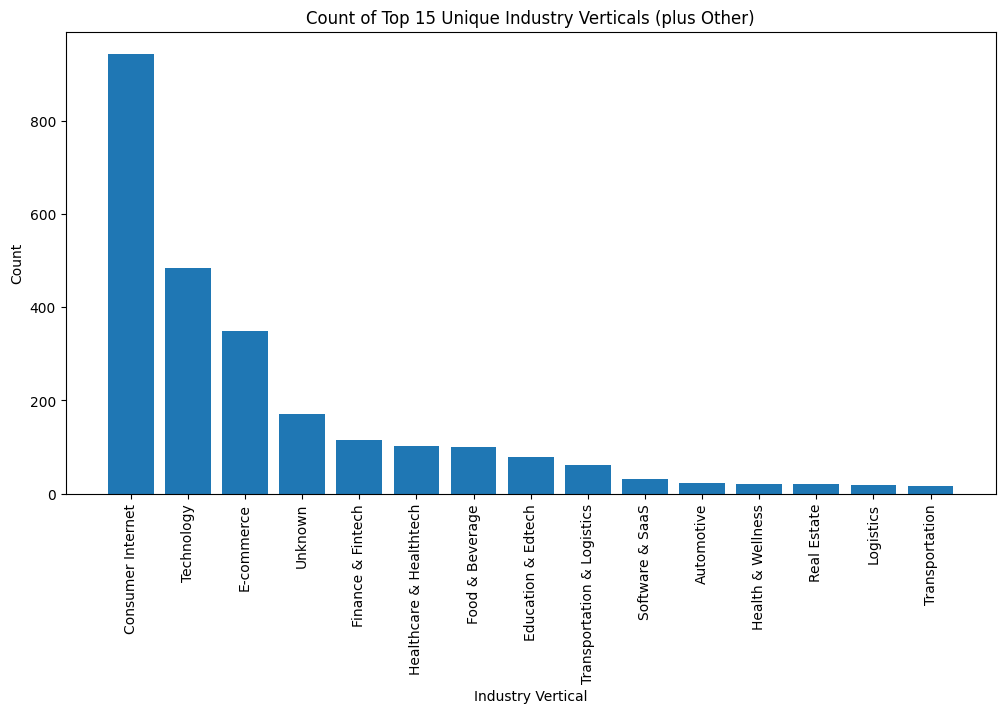

In [149]:
# Filter the 'Industry Vertical' column to include only the top 15 industries plus 'Other'
industry_counts = df["Industry Vertical"].value_counts()

print(industry_counts.describe())

top_industries = list(industry_counts.index[:15])
df_filtered_industry = df[df["Industry Vertical"].isin(top_industries)]

print("Description of Industry Vertical")
print(df['Industry Vertical'].describe())

# Bar chart of top 15 Industry Verticals
plt.figure(figsize=(12,6))
industry_counts = df_filtered_industry["Industry Vertical"].value_counts()
plt.bar(industry_counts.index, industry_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Top 15 Unique Industry Verticals (plus Other)")
plt.xlabel("Industry Vertical")
plt.ylabel("Count")
plt.show()

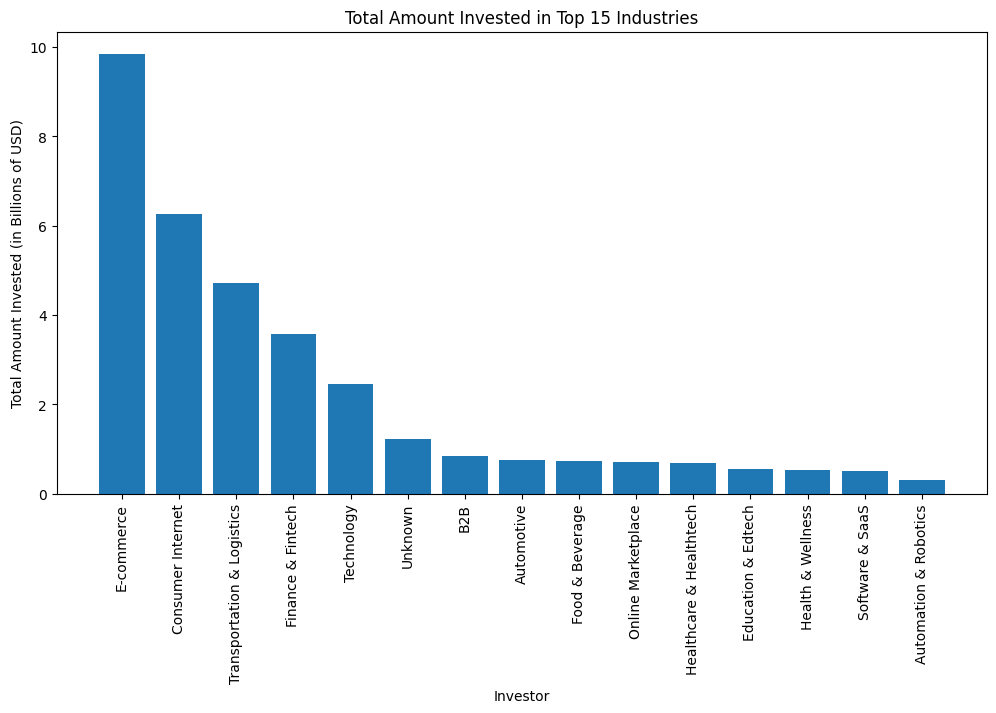

In [150]:
# Group the DataFrame by "Investors Name" and sum the corresponding "Amount in USD" values for each group
industry_amounts = df.groupby("Industry Vertical")["Amount in USD"].sum()

# Sort the resulting Series in descending order by the total amount invested
industry_amounts = industry_amounts.sort_values(ascending=False)

# Select the top 15 investors with the highest total investment amount
top_industries = industry_amounts[:15]

# Create a new DataFrame to hold the top investor amounts
top_industries_df = pd.DataFrame({"Industry": top_industries.index, "Total Amount Invested": top_industries.values / 1e9})

# Create a bar chart using Matplotlib to visualize the total amount invested by the top 15 investors and the "Other" category
plt.figure(figsize=(12,6))
plt.bar(top_industries_df["Industry"], top_industries_df["Total Amount Invested"])
plt.xticks(rotation=90)
plt.title("Total Amount Invested in Top 15 Industries")
plt.xlabel("Investor")
plt.ylabel("Total Amount Invested (in Billions of USD)")
plt.show()

In [151]:
(industry_amounts / 1e9).describe()

count    113.000000
mean       0.322741
std        1.235905
min        0.000000
25%        0.000410
50%        0.007500
75%        0.075800
max        9.851313
Name: Amount in USD, dtype: float64

Description of Cities
count          2864
unique          112
top       Bangalore
freq            700
Name: City  Location, dtype: object
Description of City Counts
count    112.000000
mean      25.571429
std       97.891254
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      700.000000
Name: City  Location, dtype: float64


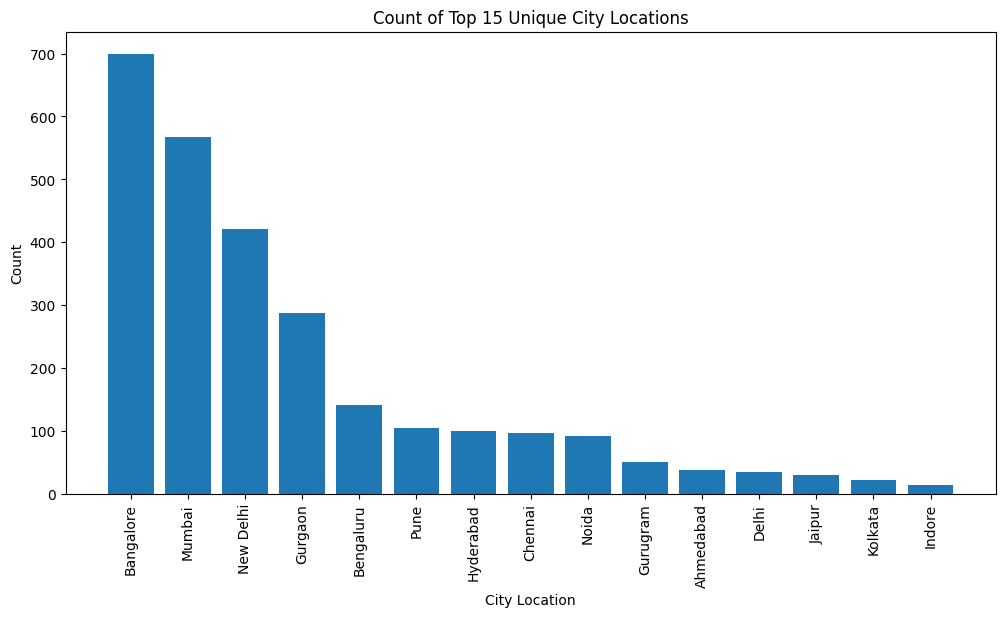

In [152]:
# Filter the 'City Location' column to include only the top 15 cities
df_filtered = df.copy()
city_counts = df_filtered["City  Location"].value_counts()
top_cities = city_counts.index[:15]
df_filtered = df_filtered[df_filtered['City  Location'].isin(top_cities)]

print("Description of Cities")
print(df['City  Location'].describe())

print("Description of City Counts")
print(city_counts.describe())

# Bar chart of top 15 City Locations
plt.figure(figsize=(12,6))
city_counts = df_filtered["City  Location"].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90)
plt.title("Count of Top 15 Unique City Locations")
plt.xlabel("City Location")
plt.ylabel("Count")
plt.show()

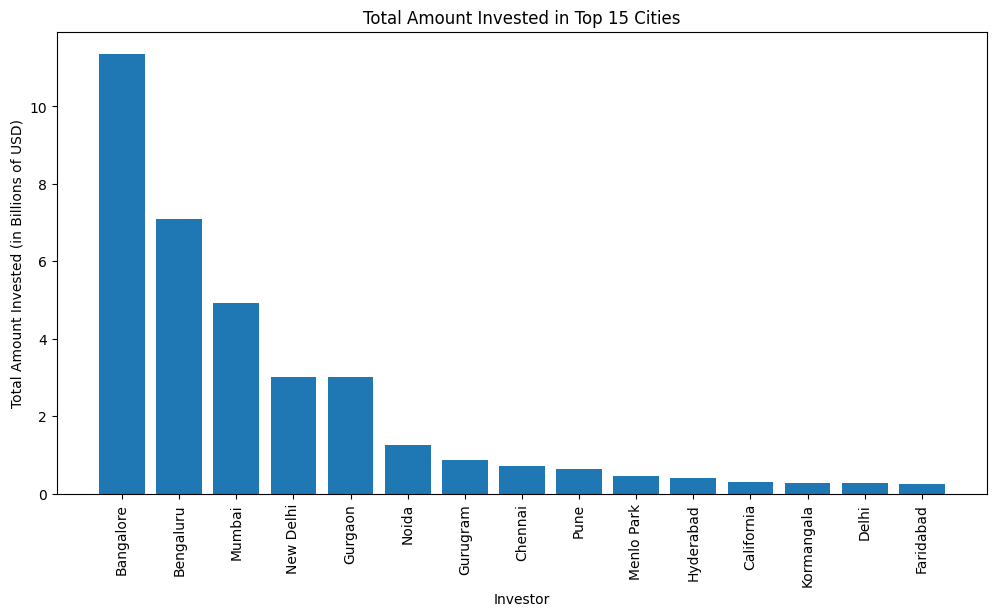

In [153]:
# Group the DataFrame by "Investors Name" and sum the corresponding "Amount in USD" values for each group
city_amounts = df.groupby("City  Location")["Amount in USD"].sum()

# Sort the resulting Series in descending order by the total amount invested
city_amounts = city_amounts.sort_values(ascending=False)

# print(city_amounts)

# Select the top 15 investors with the highest total investment amount
top_cities = city_amounts[:15]

# Create a new DataFrame to hold the top investor amounts
top_cities_df = pd.DataFrame({"City": top_cities.index, "Total Amount Invested": top_cities.values / 1e9})

# Create a bar chart using Matplotlib to visualize the total amount invested by the top 15 investors and the "Other" category
plt.figure(figsize=(12,6))
plt.bar(top_cities_df["City"], top_cities_df["Total Amount Invested"])
plt.xticks(rotation=90)
plt.title("Total Amount Invested in Top 15 Cities")
plt.xlabel("Investor")
plt.ylabel("Total Amount Invested (in Billions of USD)")
plt.show()


In [154]:
(city_amounts / 1e9).describe()

count    112.000000
mean       0.328445
std        1.388213
min        0.000000
25%        0.000049
50%        0.003000
75%        0.048075
max       11.361588
Name: Amount in USD, dtype: float64

count    2.412000e+03
mean     1.551975e+07
std      1.128878e+08
min      0.000000e+00
25%      0.000000e+00
50%      5.500000e+05
75%      5.000000e+06
max      3.900000e+09
Name: Amount in USD, dtype: float64
Description of Investors/Syndicates
count                      3020
unique                     2412
top       Undisclosed Investors
freq                         39
Name: Investors Name, dtype: object


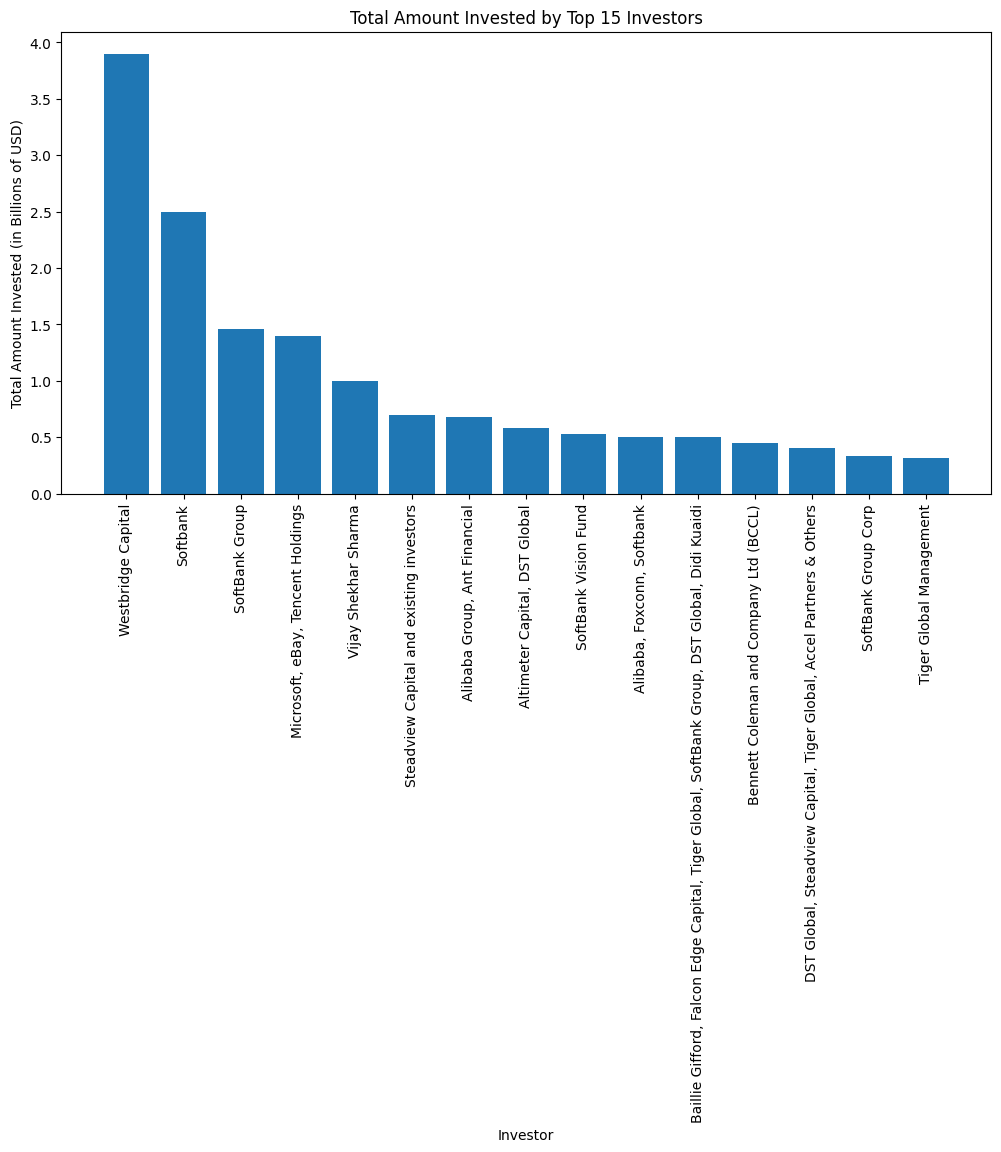

In [155]:
# Group the DataFrame by "Investors Name" and sum the corresponding "Amount in USD" values for each group
investor_amounts = df.groupby("Investors Name")["Amount in USD"].sum()

# Sort the resulting Series in descending order by the total amount invested
investor_amounts = investor_amounts.sort_values(ascending=False)

print(investor_amounts.describe())

print("Description of Investors/Syndicates")
print(df['Investors Name'].describe())

# Select the top 15 investors with the highest total investment amount
top_investors = investor_amounts[:15]

# Create a new DataFrame to hold the top investor amounts
top_investors_df = pd.DataFrame({"Investor": top_investors.index, "Total Amount Invested": top_investors.values / 1e9})

# Create a bar chart using Matplotlib to visualize the total amount invested by the top 15 investors and the "Other" category
plt.figure(figsize=(12,6))
plt.bar(top_investors_df["Investor"], top_investors_df["Total Amount Invested"])
plt.xticks(rotation=90)
plt.title("Total Amount Invested by Top 15 Investors")
plt.xlabel("Investor")
plt.ylabel("Total Amount Invested (in Billions of USD)")
plt.show()

In [156]:
(investor_amounts / 1e9).describe()

count    2412.000000
mean        0.015520
std         0.112888
min         0.000000
25%         0.000000
50%         0.000550
75%         0.005000
max         3.900000
Name: Amount in USD, dtype: float64

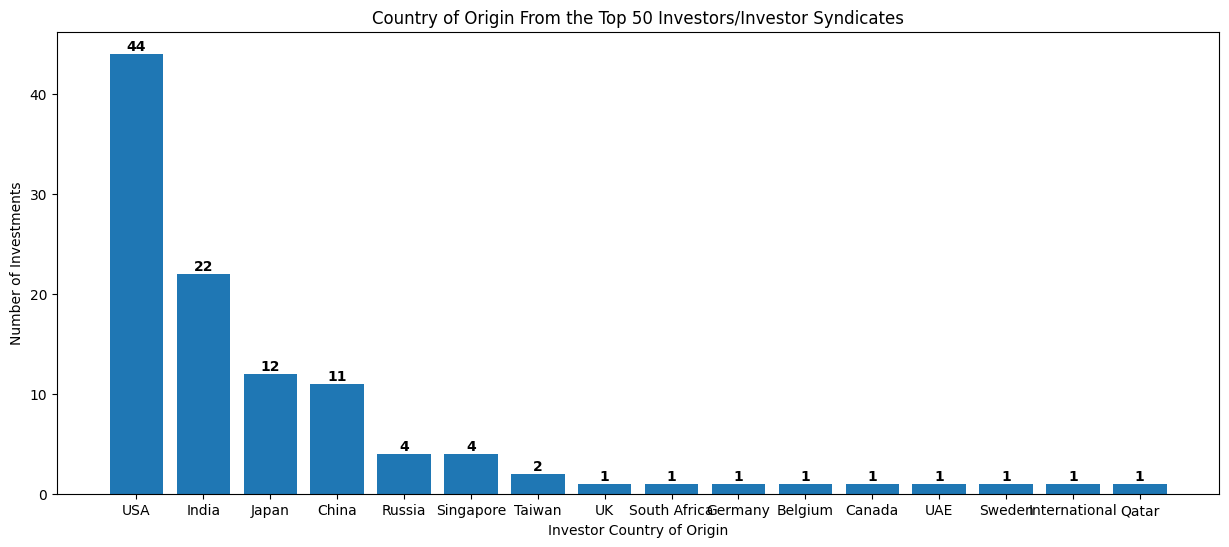

In [157]:
# Top 50 Investors Country Mapping

investor_country_mapping = {
"Westbridge Capital": "India",
"Softbank": "Japan",
"SoftBank Group": "Japan",
"Microsoft, eBay, Tencent Holdings": "USA, USA, China",
"Vijay Shekhar Sharma": "India",
"Steadview Capital and existing investors": "India",
"Alibaba Group, Ant Financial": "China, China",
"Altimeter Capital, DST Global": "USA, Russia",
"SoftBank Vision Fund": "Japan",
"Alibaba, Foxconn, Softbank": "China, Taiwan, Japan",
"Baillie Gifford, Falcon Edge Capital, Tiger Global, SoftBank Group, DST Global, Didi Kuaidi": "UK, USA, USA, Japan, Russia, China",
"Bennett Coleman and Company Ltd (BCCL)": "India",
"DST Global, Steadview Capital, Tiger Global, Accel Partners & Others": "Russia, India, USA, USA",
"SoftBank Group Corp": "Japan",
"Tiger Global Management": "USA",
"Alibaba, Helion Venture Partners, Bessemer Venture Partners, Ascent Capital": "China, India, USA, India",
"Naspers": "South Africa",
"Undisclosed investors": "Undisclosed",
"Matrix Partners, Stellaris Venture Partners, Kalaari Capital": "USA, India, India",
"SIMI Pacific Pte": "Singapore",
"SoftBank Group, Sequoia Capital India, Lightspeed Venture Partners, Greenoaks Capital, Hero Enterprise": "Japan, India, USA, USA, India",
"SoftBank Vision Fund, Lightspeed Venture Partners, Sequoia Capital India Advisors, Greenoaks Capital Partners": "Japan, USA, India, USA",
"Warburg Pincus": "USA",
"Sequoia Capital and Temasek Holdings, EDBI, Burda Principal Investments, and Sofina": "USA, Singapore, Singapore, Germany, Belgium",
"DST Global and Lightspeed Venture Partners\xe2\x80\x99 global fund.": "Russia, USA",
"Falcon Edge Capital, NY based Hedge Fund, Tiger Global, Softbank": "USA, USA, USA, Japan",
"Amour Infrastructure": "India",
"Alibaba": "China",
"Ontario Teachers\xe2\x80\x99 Pension Plan & Others": "Canada",
"IAN Fund and DSG Consumer Partners": "India, India",
"SoftBank Vision Fund & Info Edge (India) Ltd": "Japan, India",
"Ant Financials": "China",
"Global Institutional Investors": "Various",
"Sequoia Capital": "USA",
"Ctrip.com International Ltd": "China",
"Tencent Holdings, Foxconn Technology Group, Tiger Global, SoftBank Group, Bharti Enterprises": "China, Taiwan, USA, Japan, India",
"Lighthouse": "USA",
"Abraaj Group": "UAE",
"Tiger Global, Investment AB Kinnevik, Steadview Capital": "USA, Sweden, India",
"Sequoia, CapitalG, Accel": "USA, USA, USA",
"Goldman Sachs Investment Partners and Silicon Valley-based Accel, Wellington, Sequoia Capital, B Capital, LightStreet, Sands Capital and International Finance Corporation": "USA, USA, USA, USA, USA, USA, USA, International",
"Qatar Investment Authority": "Qatar",
"Ant Financial": "China",
"Temaseasek Holdings, March Capital, Warburg Pincus": "Singapore, USA, USA",
"Equanimity Ventures": "India",
"Azim Premji, Binny Bansal": "India, India",
"Altimeter Capital, Sutter Hill Ventures": "USA, USA",
"TA Associates": "USA",
"Softbank, Tiger Global, Sequoia Capital, Apoletto Managers": "Japan, USA, USA, USA",
"IDG Ventures, Accel Partners, Kalaari Capital and Others": "USA, USA, India"
}

country_counts = {}

for investors, countries in investor_country_mapping.items():
    if countries not in ["Undisclosed", "Various", "International"]:
        individual_countries = countries.split(", ")
        for country in individual_countries:
            if country in country_counts:
                country_counts[country] += 1
            else:
                country_counts[country] = 1
                
# Sort
sorted_country_counts = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True))

# Prepare data for plotting
countries = list(sorted_country_counts.keys())
counts = list(sorted_country_counts.values())

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(countries, counts)
plt.xlabel('Investor Country of Origin')
plt.ylabel('Number of Investments')
plt.title('Country of Origin From the Top 50 Investors/Investor Syndicates')

# Add count values at the end of each bar
for i, (country, count) in enumerate(sorted_country_counts.items()):
    plt.text(i, count, str(count), color='black', fontweight='bold', fontsize=10, ha='center', va='bottom')

plt.show()

Description of Investment Type
count                   3044
unique                    12
top       Seed/Angel Funding
freq                    1551
Name: InvestmentnType, dtype: object


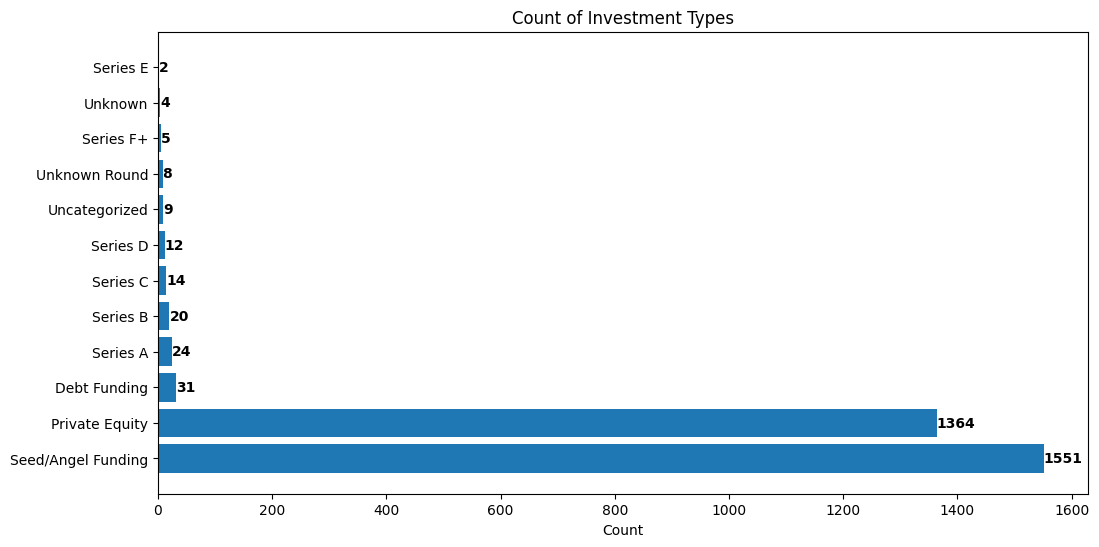

In [145]:
# 5. List and count of all unique "Investment Type"
investment_counts = df["InvestmentnType"].value_counts()

print("Description of Investment Type")
print(df['InvestmentnType'].describe())

plt.figure(figsize=(12,6))
plt.barh(investment_counts.index, investment_counts.values)
plt.title("Count of Investment Types")
plt.xlabel("Count")

# Add count values at the end of each bar
for i, v in enumerate(investment_counts.values):
    plt.text(v, i, str(v), color='black', fontweight='bold', fontsize=10, ha='left', va='center')

plt.show()

# Time Analysis

In [81]:
df.rename(mapper={
        'Date dd/mm/yyyy':'Startup_date',
        'City  Location':'City',
        'Amount in USD':'Amount',
        'Startup Name':'Startupname',
        'Industry Vertical':'Industrytype',
        'Investors Name':'Investorsname'
        },axis=1, inplace=True)

df.drop(['Remarks','Sr No'],axis=1,inplace=True)

def clean_amount(amt):
    amt = str(amt)
    if ',' in amt:
        amt = amt.replace(',','')
    if amt.isnumeric():
        return float(amt)
    if amt.isalpha() or amt.startswith('\\'):
        return np.nan
    if '.' in amt:
        return float(amt)
    if '+' in amt:
        return float(amt.replace('+',''))

df['Amount'] = df['Amount'].apply(clean_amount)

x=df['Amount'].mean()
df['Amount'].fillna(x,inplace=True)

df.dropna(subset=['InvestmentnType','Investorsname'],inplace=True)

df['SubVertical'].replace(np.nan, df['SubVertical'].value_counts().idxmax(), inplace=True)

df['Industrytype'].replace(np.NaN,df['Industrytype'].value_counts().idxmax(),inplace=True)

df['City'].replace(np.NaN,df['City'].value_counts().idxmax(),inplace= True)

df.isnull().sum()

# Define a function to fix the date string by adding missing characters
def fix_date_string(date_string):
    if not isinstance(date_string, str):
        return pd.NaT
    try:
        date = datetime.strptime(date_string, '%d/%m/%Y')
    except ValueError:
        if len(date_string) == 8:
            date = datetime.strptime(date_string, '%d%m%Y')
        else:
            date = pd.NaT
    if date is not None and date is not pd.NaT:
        return date.strftime('%Y/%m/%d')
    else:
        return pd.NaT

# Apply the function to the date column
df['Startup_date'] = df['Startup_date'].apply(fix_date_string)

# Convert 'Startup_date' column to datetime data type
df['Startup_date'] = pd.to_datetime(df['Startup_date'], format='%Y-%m-%d', errors='coerce')


df['Month & Year'] = df['Startup_date'].dt.strftime('%Y-%m')

df_cat = df.select_dtypes(np.object_)
df_cat

,Startupname,Industrytype,SubVertical,City,Investorsname,InvestmentnType,Month & Year
0,BYJU’S,Technology,E-learning,Bengaluru,Tiger Global Management,Private Equity,2020-01
1,Shuttl,Transportation & Logistics,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,2020-01
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,2020-01
3,https://www.wealthbucket.in/,Finance & Fintech,Online Investment,New Delhi,Vinod Khatumal,Seed/Angel Funding,2020-01
4,Fashor,Fashion & Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed/Angel Funding,2020-01
...,...,...,...,...,...,...,...
3039,Printvenue,Unknown,Online Lending Platform,Bangalore,Asia Pacific Internet Group,Private Equity,2015-01
3040,Graphene,Unknown,Online Lending Platform,Bangalore,KARSEMVEN Fund,Private Equity,2015-01
3041,Mad Street Den,Unknown,Online Lending Platform,Bangalore,"Exfinity Fund, GrowX Ventures.",Private Equity,2015-01
3042,Simplotel,Unknown,Online Lending Platform,Bangalore,MakeMyTrip,Private Equity,2015-01


In [82]:
print("Number of Unique Startups")
print(df['Startupname'].nunique())

print("")

print("Description of Funding Amounts")
print(df['Amount'].describe())

Number of Unique Startups
2440

Description of Funding Amounts
count    3.020000e+03
mean     1.834529e+07
std      9.978773e+07
min      1.600000e+04
25%      1.000000e+06
50%      7.500000e+06
75%      1.842990e+07
max      3.900000e+09
Name: Amount, dtype: float64


In [85]:
# Group the dataframe by 'YearMonth' and sum the 'Amount' invested in each month-year combination
dg_amount = df.groupby('Month & Year')['Amount'].sum().reset_index()

# Create a line chart of total investment amounts by month-year combination
fig = px.line(dg_amount, x='Month & Year', y='Amount', title='Startup Investment Amounts In India From 2015-2020')

# Add a vertical line at January, 2016
fig.add_shape(
    type='line',
    x0='2016-01',
    x1='2016-01',
    y0=0,
    y1=dg_amount['Amount'].max(),
    yref='y',
    xref='x',
    line=dict(color='red', width=1),
    name="Startup India Initiative"
)

fig.show(renderer="browser")